<a href="https://www.kaggle.com/code/sitbayevalibek/toshkentdagi-uylar-narxlari?scriptVersionId=130199014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tashkent-real-estate-2019/uybor.xlsx


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# In this dataset, we analyze information about houses in each district of Tashkent city.

In [3]:
df = pd.read_excel("/kaggle/input/tashkent-real-estate-2019/uybor.xlsx")
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


# # **Dataset haqida umumiy  ma'lumotlar**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [5]:
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


**NaN qiymatlarni tekshirish**

In [6]:
df.isnull().sum()

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [7]:
df['district'].unique()

array(['Yunusobod', 'Yakkasaroy', 'Chilonzor', 'Uchtepa', 'Mirzo Ulugbek',
       'Yashnobod', 'Mirobod', 'Shayhontohur', 'Olmzor', 'Sergeli',
       'Yangihayot', 'Bektemir'], dtype=object)

Olmazor so'zi xato ekan. To'g'irlash kerak

In [8]:
edited = {"Olmzor":"Olmazor"}
df=df.replace(edited)

In [9]:
df['district'].unique()

array(['Yunusobod', 'Yakkasaroy', 'Chilonzor', 'Uchtepa', 'Mirzo Ulugbek',
       'Yashnobod', 'Mirobod', 'Shayhontohur', 'Olmazor', 'Sergeli',
       'Yangihayot', 'Bektemir'], dtype=object)

# **Vizual analiz qilishni boshlaymiz**

# ***Bu grafikda aksar uylar 20,000-75,000 $ atrofida ekanligini ko'rish mumkin***

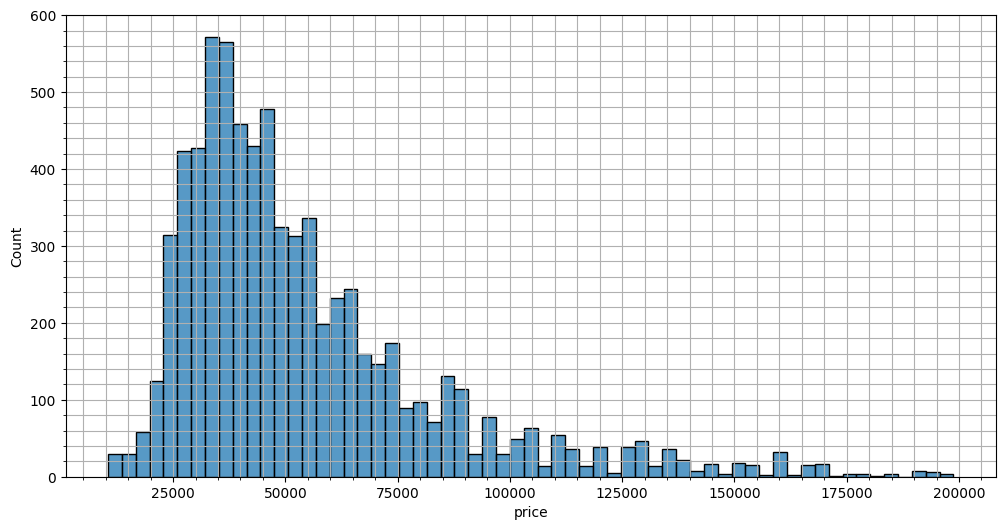

In [10]:
df=df[df['price']<200000] # Narxi 200,000 $ dan ko'p bo'lgan uylar soni kam bo'lgani uchun bu filtrni qo'llaymiz.
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

# **Bu grafikda xonalar hajmi keltirilgan. Bundan shuni anglash mumkinki hajmi 60-70 m.kv xonalar soni 500tadan ko'p ekan**

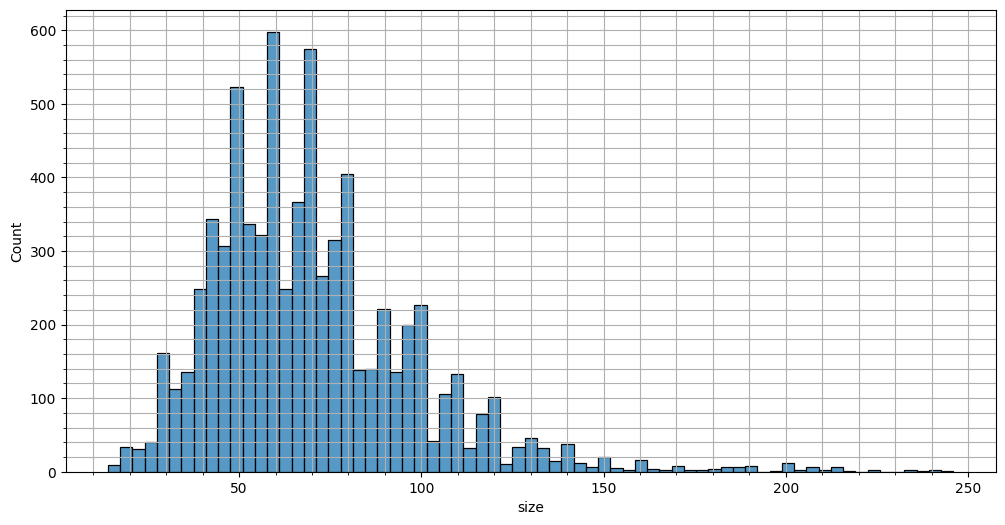

In [11]:
df=df[df['size']<250] # Xona hajmi 250 kv.metr dan ko'p bo'lganlar soni kam bo'lgani uchun bu filtrni qo'llaymiz.
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='size')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

# **Xonalar soni bo'yicha grafik**

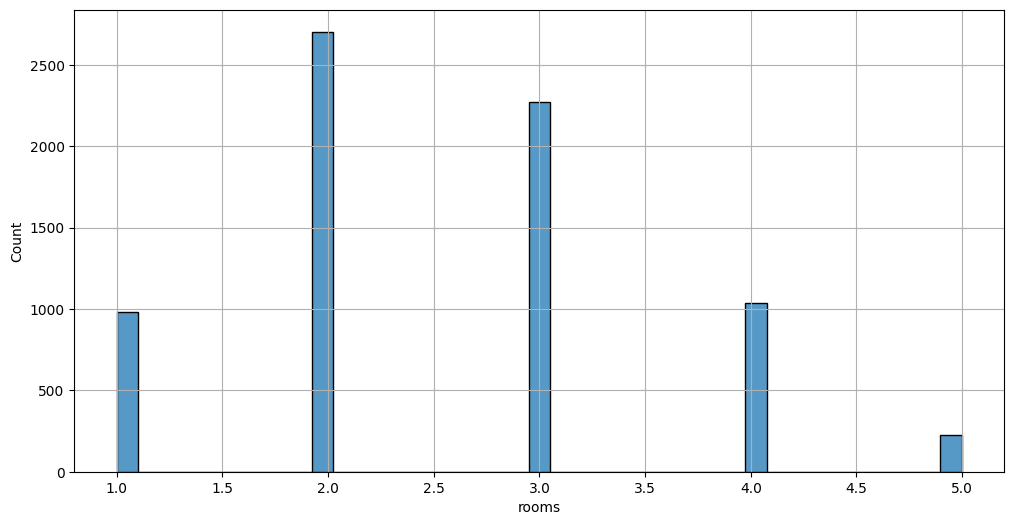

In [12]:
df=df[df['rooms']<6] # Xonalar soni 6 tadan ko'p bo'lganlar soni kam bo'lgani uchun bu filtrni qo'llaymiz.
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='rooms')
plt.grid()
plt.show()

# **Qavatlar soni bo'yicha grafik**

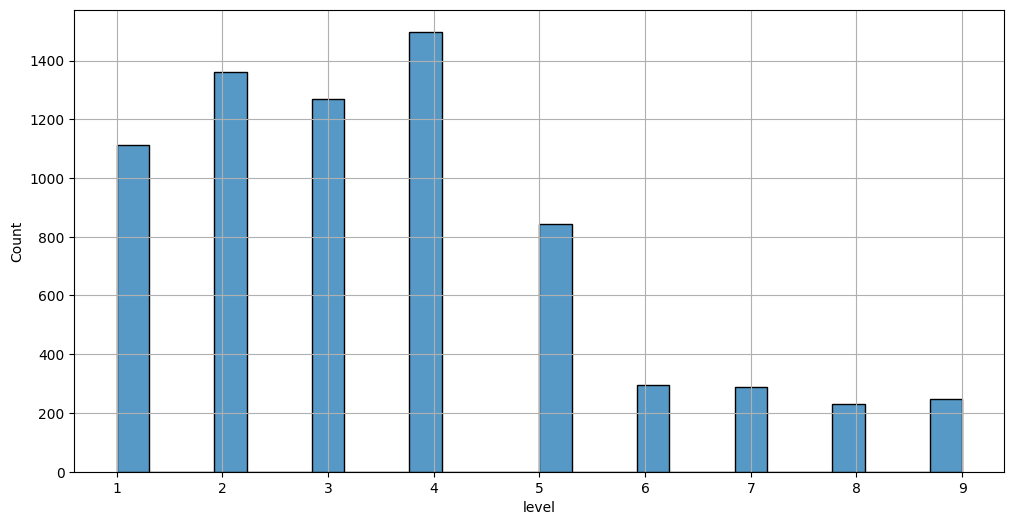

In [13]:
df=df[df['level']<10] # Qavatlar soni 10 tadan ko'p bo'lganlar soni kam bo'lgani uchun bu filtrni qo'llaymiz.
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='level')
plt.grid()
plt.show()

# 3 xonali uylar 25,000 $ dan boshlanar ekan

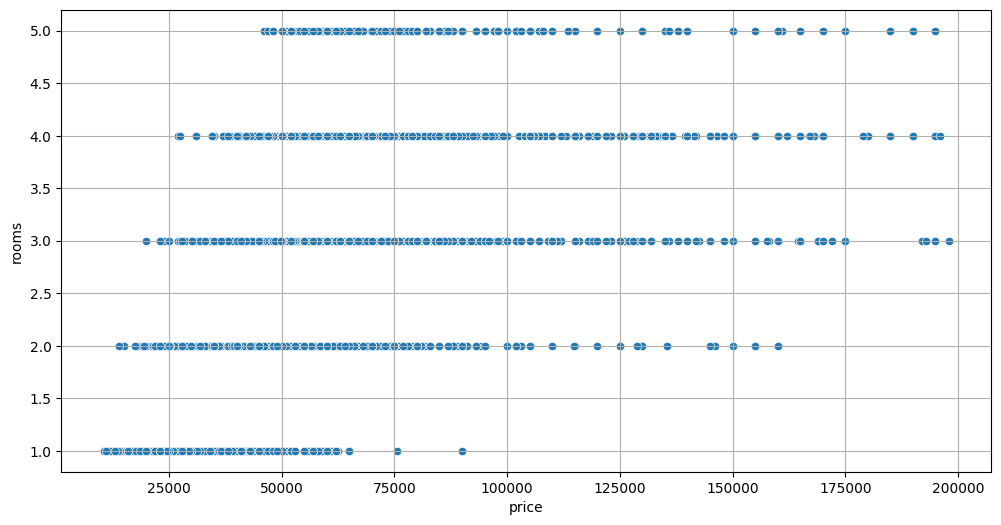

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='rooms')
plt.grid()
plt.show()

# Xonalar soni hajmi va narxi bo'yicha taqqolash

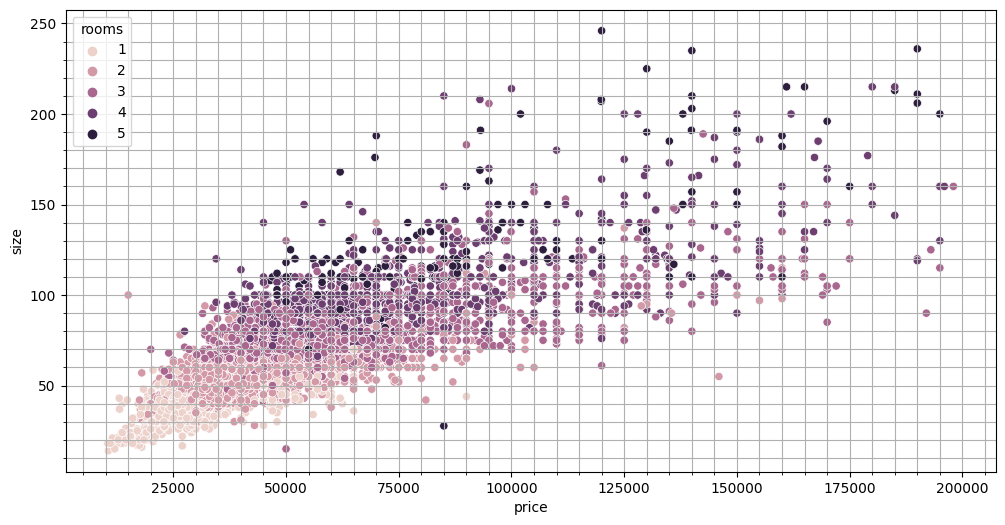

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='size', hue='rooms')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

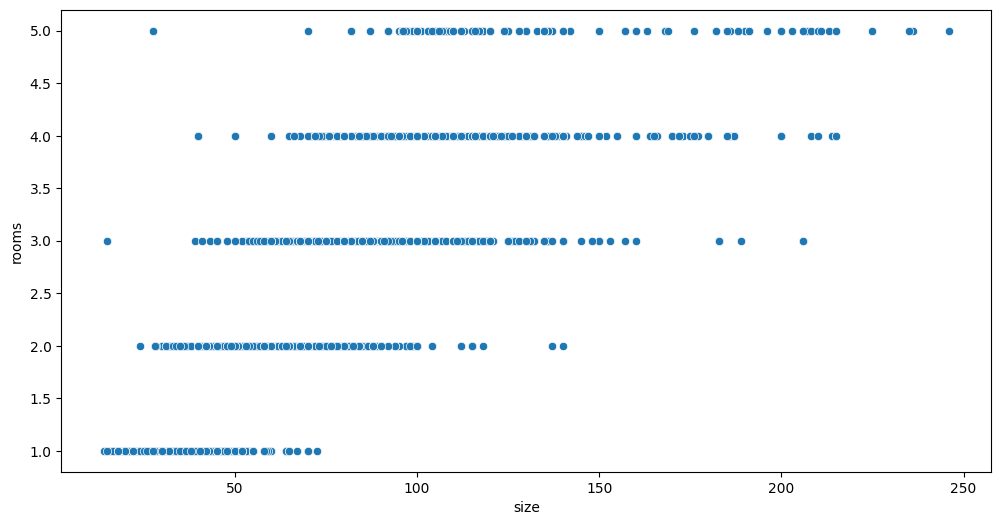

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='size', y='rooms')
plt.show()

# Bu grafikda uylar kordinatasi bo'yicha narxlari keltirilgan. 160,000$ lik uylar shahar markaziga yaqin hududlarda ekan.

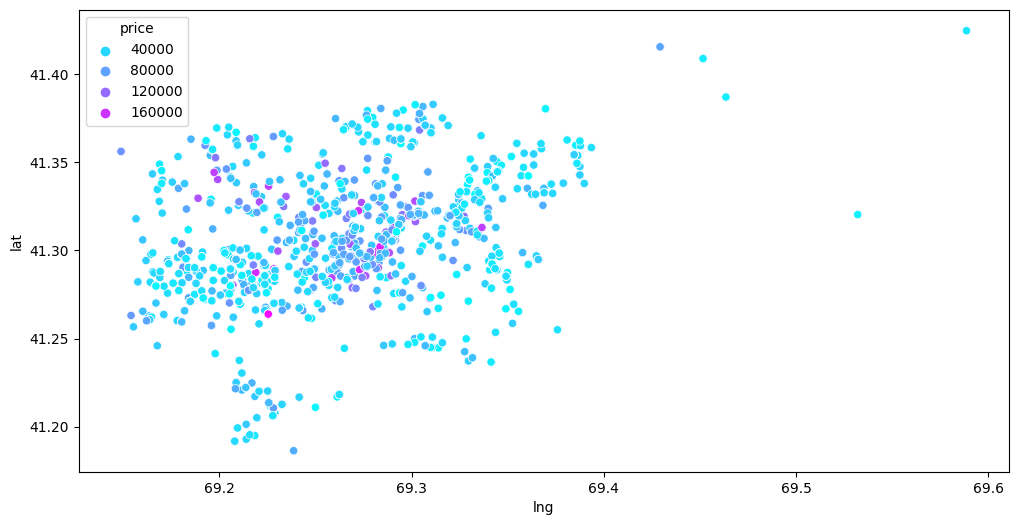

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='price', palette='cool' ) 
plt.show()

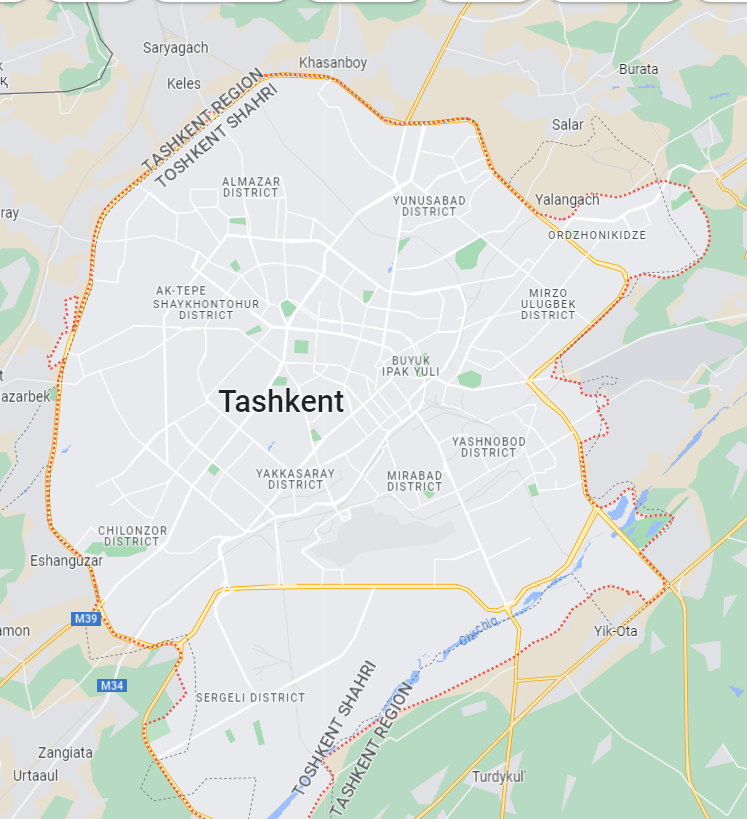

# Eng qimmat uylar Mirobod tumanida ekan

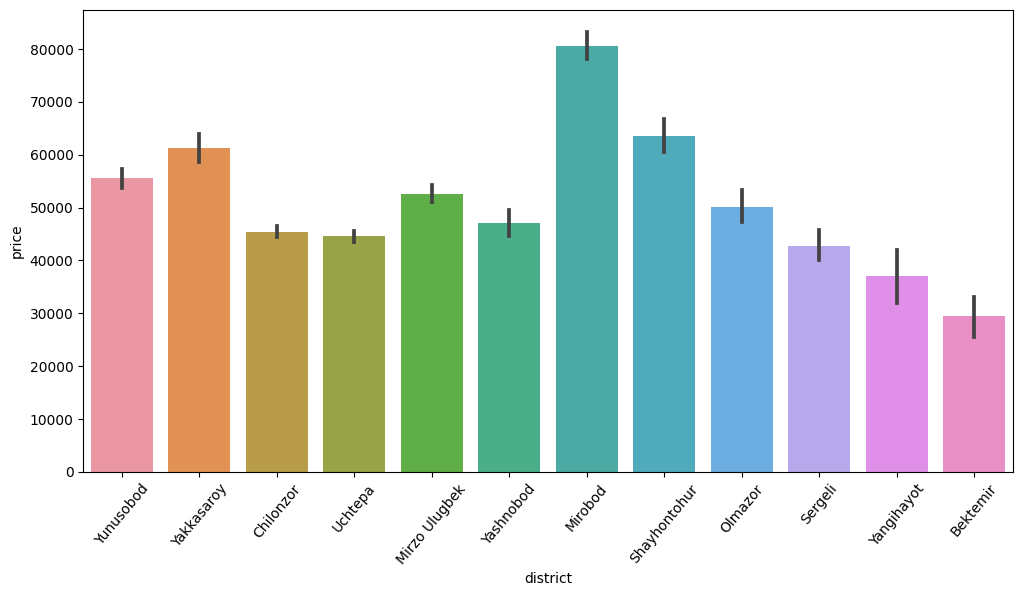

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['price'],x=df['district'])
plt.xticks(rotation=50)
plt.show()

# 2 xonali uylarning 80 foizi 50,000$ dan ochmas ekan.

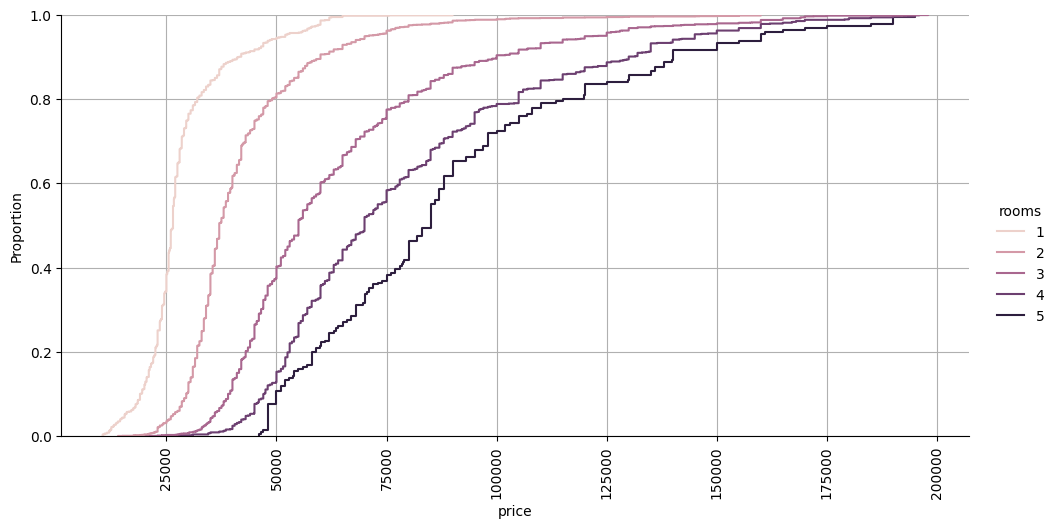

In [19]:
sns.displot(data=df, x="price", hue="rooms", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.7% of the points cannot be plac

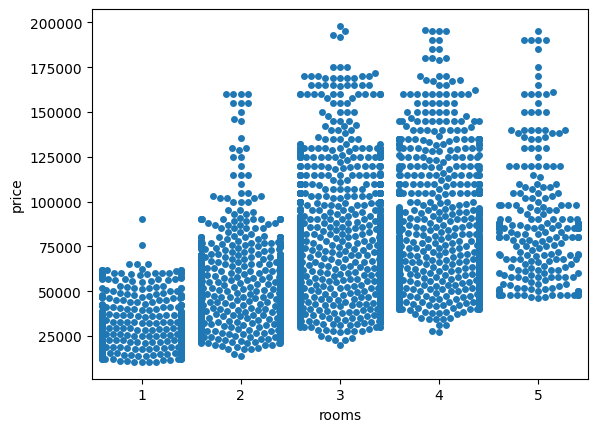

In [20]:
sns.swarmplot(data=df, x=df['rooms'], y=df['price'])
plt.show()

In [21]:
df.to_csv("Toshkentdagi-Uylar-Narxlari.csv", index=False)